In [1]:
#구글드라이브 연동
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cd /content/drive/MyDrive/버트연구보조원/biobert-master; pip install -r requirements.txt

     |████████████████████████████████| 410.9 MB 32 kB/s 
     |████████████████████████████████| 13.1 MB 35.6 MB/s 
     |████████████████████████████████| 3.8 MB 33.5 MB/s 
     |████████████████████████████████| 503 kB 42.9 MB/s 
     |████████████████████████████████| 50 kB 6.9 MB/s 
  ERROR: Failed building wheel for pandas
  Running setup.py clean for pandas
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=7a031c5284416cb476da8aacaad20af09bed25c5c8e443196f5b836e499259e2
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
Failed to build pandas
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
   

In [149]:
cd /content/drive/MyDrive/버트연구보조원/biobert-master

/content/drive/MyDrive/버트연구보조원/biobert-master


In [150]:
!dir

biocodes		    modeling_test.py	  run_ner.py
create_pretraining_data.py  optimization.py	  run_pretraining.py
download.sh		    optimization_test.py  run_qa.py
extract_features.py	    __pycache__		  run_re.py
figs			    README.md		  sample_text.txt
__init__.py		    requirements.txt	  tf_metrics.py
LICENSE			    run_classifier.py	  tokenization.py
modeling.py		    run_ner2.py		  tokenization_test.py


In [5]:
!chmod 755 -R /content/drive/MyDrive/버트연구보조원/biobert-master

In [ ]:
#!#!/bin/bash
! /content/drive/MyDrive/버트연구보조원/biobert-master/download.sh

In [154]:
#%env NER_DIR=/content/drive/MyDrive/버트연구보조원/data2/
%env NER_DIR=/content/drive/MyDrive/버트연구보조원/datasets/NER/NCBI-disease
%env OUTPUT_DIR=/content/drive/MyDrive/버트연구보조원/output

env: NER_DIR=/content/drive/MyDrive/버트연구보조원/datasets/NER/NCBI-disease
env: OUTPUT_DIR=/content/drive/MyDrive/버트연구보조원/output


In [7]:
%env BIOBERT_DIR=/content/drive/MyDrive/버트연구보조원/bioBERT
!echo $BIOBERT_DIR

env: BIOBERT_DIR=/content/drive/MyDrive/버트연구보조원/bioBERT
/content/drive/MyDrive/버트연구보조원/bioBERT


##BIO 태깅

In [ ]:
train_df = train_df[train_df['rating'] == 1]
test_df = test_df[test_df['rating'] == 1]

In [ ]:
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [ ]:
train_df['review'].iloc[2]

'"Do not use the cream that comes with this. It turned my hoo-ha into a burning ring of fire. It is 1 am and I have to work tomorrow. It&#039;s going to be a sleepless night for me"'

In [ ]:
for i in range(len(train_df)):
  train_df['review'].iloc[i] = train_df['review'].iloc[i].replace('.', '') + '.'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
for i in range(len(test_df)):
  test_df['review'].iloc[i] = test_df['review'].iloc[i].replace('.', '') + '.'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
# https://omicro03.medium.com/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC-nlp-21%EC%9D%BC%EC%B0%A8-%EC%96%91%EB%B0%A9%ED%96%A5-lstm%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%9C-%EA%B0%9C%EC%B2%B4%EB%AA%85-%EC%9D%B8%EC%8B%9D-68f21ade304d

from collections import Counter
vocab = Counter()
import re

In [ ]:
!pip install unidecode # unidecode 패키지 다운로드

import unidecode

     |████████████████████████████████| 235 kB 5.4 MB/s 


In [ ]:
f = open('/content/drive/MyDrive/버트연구보조원/train.txt')
#f = unidecode.unidecode(open('/content/drive/My Drive/버트연구보조원/train.txt').read())
#print(f)
sentences = []
sentence = []
ner_set = set()
# 파이썬은 set의 중복을 허용하지 않음. 개체명 태깅의 경우의 수.
# 즉, 종류를 알아내기 위함임.
for line in f:
  if len(line)==0 or line.startswith('-DOCSTART') or line[0]=="\n":
    if len(sentence) > 0:
      sentences.append(sentence)
      sentence=[]
    continue
  splits = line.split(' ')
    # 공백을 기준으로 속성을 구분한다.
  splits[-1] = re.sub(r'\n', '', splits[-1])
    # 개체명 태깅 뒤에 붙어있는 줄바꿈 표시 \n을 제거한다.
  word=splits[0].lower()
    # 단어들은 소문자로 바꿔서 저장한다. 단어의 수를 줄이기 위해서이다.
  vocab[word]=vocab[word]+1
    # 단어마다 빈도 수가 몇 인지 기록한다.
  sentence.append([word, splits[-1]])
    # 단어와 개체명 태깅만 기록한다.
  ner_set.add(splits[-1])
    # set에다가 개체명 태깅을 집어 넣는다. 중복은 허용되지 않으므로
    # 나중에 개체명 태깅이 어떤 종류가 있는지 확인할 수 있다.

In [ ]:
sentences[:3]

[[['eu', 'B-ORG'],
  ['rejects', 'O'],
  ['german', 'B-MISC'],
  ['call', 'O'],
  ['to', 'O'],
  ['boycott', 'O'],
  ['british', 'B-MISC'],
  ['lamb', 'O'],
  ['.', 'O']],
 [['peter', 'B-PER'], ['blackburn', 'I-PER']],
 [['brussels', 'B-LOC'], ['1996-08-22', 'O']]]

In [ ]:
len(vocab)

21009

In [ ]:
vocab_sorted = sorted(vocab.items(), key=lambda x:x[1], reverse=True)
word_to_index = {w: i+2 for i, (w, n) in enumerate(vocab_sorted) if n > 5}
word_to_index['PAD'] = 0 # 패딩을 위해 인덱스 0 할당
word_to_index['OOV'] = 1 # 모르는 단어를 위해 인덱스 1 할당
word_to_index

{'the': 2,
 '.': 3,
 ',': 4,
 'of': 5,
 'in': 6,
 'to': 7,
 'a': 8,
 'and': 9,
 '(': 10,
 ')': 11,
 '"': 12,
 'on': 13,
 'said': 14,
 "'s": 15,
 'for': 16,
 '1': 17,
 '-': 18,
 'at': 19,
 'was': 20,
 '2': 21,
 '0': 22,
 '3': 23,
 'with': 24,
 'that': 25,
 'he': 26,
 'from': 27,
 'it': 28,
 'by': 29,
 'is': 30,
 ':': 31,
 'as': 32,
 '4': 33,
 'had': 34,
 'his': 35,
 'has': 36,
 'but': 37,
 'an': 38,
 'not': 39,
 'were': 40,
 'be': 41,
 'after': 42,
 'have': 43,
 'first': 44,
 'new': 45,
 'who': 46,
 'will': 47,
 'they': 48,
 '5': 49,
 'two': 50,
 'u.s.': 51,
 'been': 52,
 '$': 53,
 '--': 54,
 'their': 55,
 'beat': 56,
 'are': 57,
 '6': 58,
 'which': 59,
 'would': 60,
 'this': 61,
 'up': 62,
 'its': 63,
 'year': 64,
 'i': 65,
 'last': 66,
 'percent': 67,
 'out': 68,
 'we': 69,
 'thursday': 70,
 'one': 71,
 'million': 72,
 'over': 73,
 'government': 74,
 'wednesday': 75,
 'police': 76,
 '7': 77,
 'results': 78,
 'against': 79,
 'second': 80,
 'when': 81,
 '/': 82,
 'also': 83,
 'tuesday':

In [ ]:
print(len(word_to_index))

3939


In [ ]:
ner_to_index = {}
ner_to_index['PAD'] = 0
i = 1
for ner in ner_set:
    ner_to_index[ner] = i
    i += 1
print(ner_to_index)


{'PAD': 0, 'I-LOC': 1, 'B-PER': 2, 'B-LOC': 3, 'I-ORG': 4, 'B-MISC': 5, 'I-PER': 6, 'I-MISC': 7, 'B-ORG': 8, 'O': 9}


In [ ]:
data_X = []
for s in sentences:
    temp_X = []
    for w, label in s:
        try:
            temp_X.append(word_to_index.get(w,1))
        except KeyError:
            temp_X.append(word_to_index['OOV'])
    
    data_X.append(temp_X)
print(data_X)

[[989, 1, 205, 629, 7, 1, 216, 1, 3], [774, 1872], [726, 150], [2, 219, 334, 14, 13, 70, 28, 1, 24, 205, 1, 7, 2404, 7, 1, 216, 1, 406, 3382, 2009, 519, 1745, 1873, 648, 309, 41, 1, 7, 1632, 3], [124, 15, 2991, 7, 2, 219, 300, 15, 2660, 801, 1, 1, 14, 13, 75, 2404, 276, 914, 1, 27, 539, 127, 125, 137, 406, 2, 2405, 1, 20, 1, 3], [12, 69, 185, 213, 357, 220, 567, 1, 170, 69, 185, 213, 859, 220, 3383, 16, 28, 4, 12, 2, 334, 15, 416, 187, 1, 594, 2010, 1, 90, 8, 188, 3384, 3], [26, 14, 683, 2405, 2181, 20, 2661, 9, 141, 28, 20, 365, 25, 775, 20, 990, 28, 276, 41, 580, 29, 2, 219, 300, 3], [26, 14, 8, 2182, 66, 233, 29, 989, 1129, 2406, 1, 3385, 7, 595, 1632, 1, 4, 1, 9, 1, 1, 27, 2, 581, 9, 2662, 1029, 3386, 20, 8, 3387, 2992, 9, 1, 1301, 7, 1, 581, 630, 3], [3385, 1544, 1, 1462, 42, 744, 27, 137, 9, 146, 25, 104, 1, 860, 1632, 126, 745, 1, 1, 1, 10, 2011, 11, 54, 1745, 1873, 648, 3], [37, 3385, 438, 7, 2993, 35, 2182, 42, 2, 989, 15, 2407, 2660, 801, 4, 1, 2662, 630, 138, 4, 1874, 141, 5

In [ ]:
index_to_word = {}
for key, value in word_to_index.items():
    # 인덱스를 단어로 바꾸기 위해 index_to_word를 생성
    index_to_word[value] = key
temp = []
for index in data_X[0]:
    # 첫번째 데이터 안의 인덱스들에 대해서
    temp.append(index_to_word[index])
    # 다시 단어로 변환
print(sentences[0])
print(temp)

[['eu', 'B-ORG'], ['rejects', 'O'], ['german', 'B-MISC'], ['call', 'O'], ['to', 'O'], ['boycott', 'O'], ['british', 'B-MISC'], ['lamb', 'O'], ['.', 'O']]
['eu', 'OOV', 'german', 'call', 'to', 'OOV', 'british', 'OOV', '.']


In [ ]:
data_y = []
for s in sentences:
    temp_y = []
    for w, label in s:
        temp_y.append(ner_to_index.get(label))
    data_y.append(temp_y)
print(data_X[:4])
print(data_y[:4])

[[989, 1, 205, 629, 7, 1, 216, 1, 3], [774, 1872], [726, 150], [2, 219, 334, 14, 13, 70, 28, 1, 24, 205, 1, 7, 2404, 7, 1, 216, 1, 406, 3382, 2009, 519, 1745, 1873, 648, 309, 41, 1, 7, 1632, 3]]
[[8, 9, 5, 9, 9, 9, 5, 9, 9], [2, 6], [3, 9], [9, 8, 4, 9, 9, 9, 9, 9, 9, 5, 9, 9, 9, 9, 9, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]]


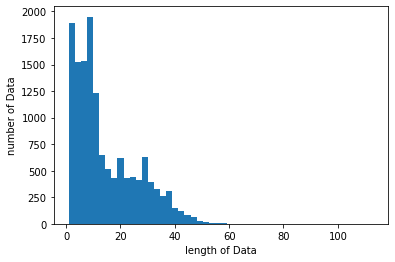

In [ ]:
import matplotlib.pyplot as plt
plt.hist([len(s) for s in data_X], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [ ]:
print(max(len(l) for l in data_X))
# 모든 데이터에서 길이가 가장 긴 데이터의 길이 출력
print(max(len(l) for l in data_y))
# 모든 데이터에서 길이가 가장 긴 데이터의 길이 출력

113
113


In [ ]:
# 가장 긴 데이터의 길이는 113이지만, 패딩 수가 많아지므로
# 70으로 패딩함
max_len = 70
from tensorflow.keras.preprocessing.sequence import pad_sequences

pad_X = pad_sequences(data_X, padding='post', maxlen=max_len)
# data_X의 모든 데이터의 길이를 맞출 때 뒤의 공간에 숫자 0으로 채움.
pad_y = pad_sequences(data_y, padding='post', maxlen=max_len)
# data_y의 모든 데이터의 길이를 맞출 때 뒤의 공간에 숫자 0으로 채움.

In [ ]:
print(min(len(l) for l in pad_X))
# 모든 데이터에서 길이가 가장 짧은 데이터의 길이 출력
print(min(len(l) for l in pad_y))
# 모든 데이터에서 길이가 가장 짧은 데이터의 길이 출력

70
70


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pad_X, pad_y, test_size=.2, random_state=777)

In [ ]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

11232 2809 11232 2809


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, TimeDistributed
from tensorflow.keras.optimizers import Adam
n_words = len(word_to_index)
n_labels = len(ner_to_index)
max_len = 70
model = Sequential()
model.add(Embedding(input_dim=n_words, output_dim=16, input_length=max_len,
                   mask_zero=True))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(TimeDistributed(Dense(n_labels, activation="softmax")))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

In [ ]:
%matplotlib inline
import tensorflow as tf
#from tf.keras.utils import np_utils

y_train2 = tf.keras.utils.to_categorical(y_train)
print(y_train2[0][0])
model.fit(X_train, y_train2, epochs=8)

y_test2 = tf.keras.utils.to_categorical(y_test)
print("\n 테스트 정확도 : %.4f" % (model.evaluate(X_test, y_test2)[1]))

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Train on 11232 samples
Epoch 1/8
11232/11232 [==============================] - 133s 12ms/sample - loss: 0.1794 - acc: 0.8300
Epoch 2/8
11232/11232 [==============================] - 132s 12ms/sample - loss: 0.0985 - acc: 0.8535
Epoch 3/8
11232/11232 [==============================] - 132s 12ms/sample - loss: 0.0778 - acc: 0.8862
Epoch 4/8
11232/11232 [==============================] - 133s 12ms/sample - loss: 0.0615 - acc: 0.9148
Epoch 5/8
11232/11232 [==============================] - 131s 12ms/sample - loss: 0.0458 - acc: 0.9376
Epoch 6/8
11232/11232 [==============================] - 130s 12ms/sample - loss: 0.0365 - acc: 0.9498
Epoch 7/8
11232/11232 [==============================] - 129s 12ms/sample - loss: 0.0313 - acc: 0.9570
Epoch 8/8
2809/2809 [==============================] - 9s 3ms/sample - loss: 0.0333 - acc: 0.9530

 테스트 정확도 : 0.9530


In [ ]:
import numpy as np
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value] = key
index_to_ner={}
for key, value in ner_to_index.items():
    index_to_ner[value] = key
i = 10
# 확인하고 싶은 인덱스
y_predicted = model.predict(np.array([X_test[i]]))
# 입력한 테스트 데이터에 대해서 예측 y를 리턴
y_predicted = np.argmax(y_predicted, axis=-1)
# 원-핫 인코딩을 다시 정수 인코딩으로 변경함.
true = np.argmax(y_test2[i], -1)
# 원-핫 인코딩을 다시 정수 인코딩으로 변경함.
print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35*"-")
for w, t, pred in zip(X_test[i], true, y_predicted[0]):
    if w != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[w], index_to_ner[t], index_to_ner[pred]))

단어             |실제값  |예측값
-----------------------------------
sarah            : B-PER   B-PER
brady            : I-PER   I-PER
,                : O       O
whose            : O       O
republican       : B-MISC  B-MISC
husband          : O       O
was              : O       O
OOV              : O       O
OOV              : O       O
in               : O       O
an               : O       O
OOV              : O       O
attempt          : O       O
on               : O       O
president        : O       O
ronald           : B-PER   B-PER
reagan           : I-PER   I-PER
,                : O       O
took             : O       O
centre           : O       O
stage            : O       O
at               : O       O
the              : O       O
democratic       : B-MISC  B-MISC
national         : I-MISC  I-MISC
convention       : I-MISC  O
on               : O       O
monday           : O       O
night            : O       O
to               : O       O
OOV              : O       O
presiden

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from nltk import pos_tag, word_tokenize


test_X = []
for s in test_df['review']:
  temp_X = []
  for w, label in pos_tag(word_tokenize(s)):
    try:
      temp_X.append(word_to_index.get(w,1))
    except KeyError:
      temp_X.append(word_to_index['OOV'])
  #print(temp_X)
  test_X.append(temp_X)
  #test_X.append(temp_X)
print(test_X)

[[1, 1, 1, 30, 1, 803, 1, 1485, 1, 34, 52, 469, 1, 16, 178, 139, 1, 2781, 1, 174, 1, 1, 18, 1003, 4, 2, 600, 1, 5, 61, 3524, 1, 24, 2, 1519, 1, 20, 3819, 29, 1, 412, 1, 134, 18, 1, 1, 1066, 1, 1, 453, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 100, 30, 1, 3524, 95, 357, 892, 1, 1, 61, 987, 6, 2, 1, 1066, 1, 1, 453, 1, 1723, 9, 1533, 556, 1, 2693, 1, 18, 256, 1521, 541, 256, 1, 1066, 1, 1, 453, 1, 881, 2031, 1, 43, 193, 28, 2548, 7, 1, 61, 1, 3289, 7, 628, 61, 30, 944, 1, 176, 1036, 7, 1, 1, 157, 61, 9, 1, 1, 36, 52, 1515, 687, 5, 8, 1, 1, 256, 1, 1066, 1, 1, 453, 1, 1024, 61, 1, 1, 1066, 1, 1, 453, 1, 1, 1, 1, 3], [1, 1, 30, 8, 2995, 5, 537, 1, 39, 1, 427, 1, 2302, 174, 28, 393, 688, 1485, 808, 1, 3], [1, 1, 1, 126, 653, 28, 8, 22, 4, 1, 60, 1, 185, 288, 1, 19, 1, 4, 9, 1531, 1, 1, 7, 442, 62, 9, 3204, 2, 493, 1, 1, 28, 7, 1, 4, 1020, 1, 4, 37, 240, 1, 1, 121, 543, 1, 7, 2108, 4, 24, 2, 368, 2161, 5, 1699, 1, 1, 688, 42, 61, 1, 28, 1, 1020, 2345, 16, 1, 4, 288, 2189, 881,

In [ ]:
print(len(test_X))

7299


[[1, 1, 1, 30, 1, 803, 1, 1485, 1, 34, 52, 469, 1, 16, 178, 139, 1, 2781, 1, 174, 1, 1, 18, 1003, 4, 2, 600, 1, 5, 61, 3524, 1, 24, 2, 1519, 1, 20, 3819, 29, 1, 412, 1, 134, 18, 1, 1, 1066, 1, 1, 453, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 100, 30, 1, 3524, 95, 357, 892, 1, 1, 61, 987, 6, 2, 1, 1066, 1, 1, 453, 1, 1723, 9, 1533, 556, 1, 2693, 1, 18, 256, 1521, 541, 256, 1, 1066, 1, 1, 453, 1, 881, 2031, 1, 43, 193, 28, 2548, 7, 1, 61, 1, 3289, 7, 628, 61, 30, 944, 1, 176, 1036, 7, 1, 1, 157, 61, 9, 1, 1, 36, 52, 1515, 687, 5, 8, 1, 1, 256, 1, 1066, 1, 1, 453, 1, 1024, 61, 1, 1, 1066, 1, 1, 453, 1, 1, 1, 1, 3], [1, 1, 30, 8, 2995, 5, 537, 1, 39, 1, 427, 1, 2302, 174, 28, 393, 688, 1485, 808, 1, 3], [1, 1, 1, 126, 653, 28, 8, 22, 4, 1, 60, 1, 185, 288, 1, 19, 1, 4, 9, 1531, 1, 1, 7, 442, 62, 9, 3204, 2, 493, 1, 1, 28, 7, 1, 4, 1020, 1, 4, 37, 240, 1, 1, 121, 543, 1, 7, 2108, 4, 24, 2, 368, 2161, 5, 1699, 1, 1, 688, 42, 61, 1, 28, 1, 1020, 2345, 16, 1, 4, 288, 2189, 881,

In [ ]:
index_to_word2 = {}
for key, value in word_to_index.items():
    # 인덱스를 단어로 바꾸기 위해 index_to_word를 생성
    index_to_word2[value] = key
temp = []
for index in test_X[0]:
    # 첫번째 데이터 안의 인덱스들에 대해서
    temp.append(index_to_word2[index])
    # 다시 단어로 변환
print(test_df['review'].iloc[0])
print(temp)

"Holy Hell is exactly how I feel I had been taking Brisdelle for 15 years The hot flashes did indeed subside - however, the side affects of this medicine coupled with the fact Noven was acquired by YET another pharmaceutical company - YOU CAN&#039;T PLACE A REP IN THE AREA, DISTRIBUTE YOUR DRUGS, AND THEN FIRE HER-AND NOT REPLACE THEREFORE there is NO medicine or support here You dumped this drug in the Dr&#039;s hands and walked away After calling Sebula - you act like you don&#039;t even care You have made it impossible to obtain this I happen to think this is illegal  I just decided to wean myself off this and Premarin It has been nothing short of a nightmare If you don&#039;t need this drug- DON&#039;T START Seriously".
['OOV', 'OOV', 'OOV', 'is', 'OOV', 'how', 'OOV', 'feel', 'OOV', 'had', 'been', 'taking', 'OOV', 'for', '15', 'years', 'OOV', 'hot', 'OOV', 'did', 'OOV', 'OOV', '-', 'however', ',', 'the', 'side', 'OOV', 'of', 'this', 'medicine', 'OOV', 'with', 'the', 'fact', 'OOV', 

In [ ]:
print(max(len(l) for l in test_X))
# 모든 데이터에서 길이가 가장 긴 데이터의 길이 출력

618


In [ ]:
# 가장 긴 데이터의 길이는 113이지만, 패딩 수가 많아지므로
# 70으로 패딩함
max_len = 70

pad_X1 = pad_sequences(test_X, padding='post', maxlen=max_len)
# data_X의 모든 데이터의 길이를 맞출 때 뒤의 공간에 숫자 0으로 채움.

In [ ]:
print(len(test_X[0]))
print(len(pad_X1[0]))

162
70


In [ ]:
print(min(len(l) for l in pad_X1))
# 모든 데이터에서 길이가 가장 짧은 데이터의 길이 출력

70


In [ ]:
dfdf=pd.DataFrame(columns=['word', 'tag'])
dfdf

Empty DataFrame
Columns: [word, tag]
Index: []

In [ ]:
index_to_word3 = {}
for key, value in word_to_index.items():
    index_to_word3[value] = key
index_to_ner2={}
for key, value in ner_to_index.items():
    index_to_ner2[value] = key

k = 0
for i in range(len(pad_X1)):

  y_predicted2 = model.predict(np.array([pad_X1[i]]))
# 입력한 테스트 데이터에 대해서 예측 y를 리턴
  y_predicted2 = np.argmax(y_predicted2, axis=-1)
# 원-핫 인코딩을 다시 정수 인코딩으로 변경함.
#true = np.argmax(y_test2[i], -1)
# 원-핫 인코딩을 다시 정수 인코딩으로 변경함.
  print("{:15}|{}".format("단어", "예측값"))
  print(35*"-")
  for w, pred in zip(pad_X1[i], y_predicted[0]):
      if w != 0: # PAD값은 제외함.
          l = []
          
          print("{:17}: {}".format(index_to_word3[w], index_to_ner2[pred][0]))
          l.append(index_to_word3[w])
          l.append(index_to_ner2[pred][0])
          dfdf.loc[k] = l
          k += 1
  dfdf.loc[k] = ['', '']
  k += 1


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
this             : O
which            : O
needed           : O
surgery          : O
to               : O
OOV              : O
OOV              : B
two              : I
months           : O
to               : O
OOV              : O
OOV              : O
very             : O
OOV              : O
OOV              : B
should           : I
not              : O
be               : O
over             : O
OOV              : O
purchase         : O
it               : O
should           : O
be               : B
only             : I
by               : O
doctor           : O
orders           : O
OOV              : O
.                : O
단어             |예측값
-----------------------------------
OOV              : B
OOV              : I
have             : O
been             : O
using            : B
this             : O
OOV              : O
for              : O
one              : O
week             : O
and              : O
OOV              : O
OOV              : O
falli

In [ ]:
dfdf

word tag
0           OOV   B
1       calling   I
2           OOV   O
3             -   O
4           you   B
...         ...  ..
434555      OOV   O
434556   before   O
434557      OOV   O
434558        .   O
434559             

[434560 rows x 2 columns]

In [ ]:
dfdf.to_csv('/content/drive/MyDrive/버트연구보조원/bio-data/test.tsv', index=False)

##숨기기

In [ ]:
train_df['review'].to_csv('/content/drive/MyDrive/버트연구보조원/bio-data/train.tsv', index=False, header=False, sep='\t')
train_df['rating'].to_csv('/content/drive/MyDrive/버트연구보조원/bio-data/train_dev.tsv', index=False, header=False, sep='\t')
test_df['review'].to_csv('/content/drive/MyDrive/버트연구보조원/bio-data/test.tsv', index=False, header=False, sep='\t')
test_df['rating'].to_csv('/content/drive/MyDrive/버트연구보조원/bio-data/devel.tsv', index=False, header=False, sep='\t')

NameError: ignored

In [ ]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('/content/drive/MyDrive/버트연구보조원/data2/drugsComTrain_raw_72608.csv', engine='python')
test_df = pd.read_csv('/content/drive/MyDrive/버트연구보조원/data2/drugsComTest_raw_24315.csv', engine='python')

In [ ]:
train_df.to_csv('/content/drive/MyDrive/버트연구보조원/data2/drugsComTrain_raw_'+str(len(train_df))+'.csv', index=False)

test_df.to_csv('/content/drive/MyDrive/버트연구보조원/data2/drugsComTest_raw_'+str(len(test_df))+'.csv', index=False)

In [ ]:
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [ ]:
# test data 1>0, 10->1로 변환
l = []
for i in range(len(test_df['rating'])):
  if test_df['rating'].iloc[i] == 1:
    l.append(0)
    #test_df['rating'].iloc[i] = 0
  if test_df['rating'].iloc[i] == 10:
    l.append(1)
    #test_df['rating'].iloc[i] = 1
test_df['label'] = l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# train data 1>0, 10->1로 변환
l = []
for i in range(len(train_df['rating'])):
  if train_df['rating'].iloc[i] == 1:
    l.append(0)
    #train_df['label'].iloc[i] = 0
  if train_df['rating'].iloc[i] == 10:
    l.append(1)
    #train_df['label'].iloc[i] = 1
train_df['label'] = l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
train_df

uniqueID  ... label
6         165907  ...     0
7         102654  ...     1
8          74811  ...     0
11         75612  ...     1
18        212077  ...     1
...          ...  ...   ...
161285    200957  ...     0
161289    105263  ...     0
161292    191035  ...     1
161293    127085  ...     0
161295     47128  ...     1

[72608 rows x 4 columns]

In [ ]:
train_df = trn_df[['uniqueID', 'review', 'rating']]
test_df = tst_df[['uniqueID', 'review', 'rating']]

In [ ]:
# rating = 1,10 추출
trn_df = df_trn[(df_trn['rating'] == 1) | (df_trn['rating'] == 10)]
tst_df = df_tst[(df_tst['rating'] == 1) | (df_tst['rating'] == 10)]

In [ ]:
import pandas as pd
import numpy as np

df_trn = pd.read_csv('/content/drive/MyDrive/버트연구보조원/data/drugsComTrain_raw.csv', engine='python')
df_tst = pd.read_csv('/content/drive/MyDrive/버트연구보조원/data/drugsComTest_raw.csv', engine='python')

#학습

##NER

In [8]:
#!mkdir -p $OUTPUT_DIR
!python run_ner.py --do_train=true --do_eval=true --vocab_file=$BIOBERT_DIR/vocab.txt --bert_config_file=$BIOBERT_DIR/bert_config.json --init_checkpoint=$BIOBERT_DIR/model.ckpt-1000000 --num_train_epochs=10.0 --data_dir=$NER_DIR --output_dir=$OUTPUT_DIR



/usr/local/lib/python3.7/dist-packages/absl/flags/_validators.py:356: UserWarning: Flag --task_name has a non-None default value; therefore, mark_flag_as_required will pass even if flag is not specified in the command line!
  'command line!' % flag_name)


W0916 16:58:03.961699 140077683566464 module_wrapper.py:139] From run_ner.py:466: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.


W0916 16:58:03.962333 140077683566464 module_wrapper.py:139] From run_ner.py:466: The name tf.logging.INFO is deprecated. Please use tf.compat.v1.logging.INFO instead.


W0916 16:58:03.962649 140077683566464 module_wrapper.py:139] From /content/drive/MyDrive/버트연구보조원/biobert-master/modeling.py:92: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0916 16:58:04.179785 140077683566464 module_wrapper.py:139] From run_ner.py:481: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.

The TensorF

In [45]:
!python biocodes/ner_detokenize2.py --token_test_path=$OUTPUT_DIR/token_test.txt --label_test_path=$OUTPUT_DIR/label_test.txt --answer_path=$NER_DIR/test.tsv --output_dir=$OUTPUT_DIR


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[')', 'O']
['in', 'O']
['order', 'O']
['to', 'O']
['find', 'O']
['a', 'O']
['molecular', 'O']
['explanation', 'O']
['for', 'O']
['the', 'O']
['cognitive', 'B']
['impairment', 'I']
['observed', 'O']
['in', 'O']
['most', 'O']
['DMD', 'B']
['patients', 'O']
['.', 'O']
['Complete', 'O']
['analysis', 'O']
['of', 'O']
['the', 'O']
['dystrophin', 'O']
['gene', 'O']
['was', 'O']
['performed', 'O']
['to', 'O']
['define', 'O']
['the', 'O']
['localization', 'O']
['of', 'O']
['deletions', 'O']
['and', 'O']
['duplications', 'O']
['in', 'O']
['relation', 'O']
['to', 'O']
['the', 'O']
['different', 'O']
['DMD', 'B']
['promoters', 'O']
['.', 'O']
['Qualitative', 'O']
['analysis', 'O']
['of', 'O']
['the', 'O']
['Dp71', 'O']
['transcript', 'O']
['and', 'O']
['testing', 'O']
['for', 'O']
['the', 'O']
['specific', 'O']
['first', 'O']
['exon', 'O']
['of', 'O']
['Dp140', 'O']
['were', 'O']
['also', 'O']
['carried', 'O']
['out', 'O']
['.', 'O']
['Neuropsychological', 'O']


In [19]:
!perl biocodes/conlleval.pl < $OUTPUT_DIR/NER_result_conll.txt

processed 24497 tokens with 960 phrases; found: 987 phrases; correct: 855.
accuracy:  98.58%; precision:  86.63%; recall:  89.06%; FB1:  87.83
             MISC: precision:  86.63%; recall:  89.06%; FB1:  87.83  987


In [21]:
!python run_ner2.py --do_train=false --do_predict=true --vocab_file= $BIOBERT_DIR /vocab.txt --bert_config_file= $BIOBERT_DIR /bert_config.json --init_checkpoint= $BIOBERT_DIR /모델. ckpt-1000000 --num_train_epochs=10.0 --data_dir=$NER_DIR --output_dir= $OUTPUT_DIR


/usr/local/lib/python3.7/dist-packages/absl/flags/_validators.py:356: UserWarning: Flag --task_name has a non-None default value; therefore, mark_flag_as_required will pass even if flag is not specified in the command line!
  'command line!' % flag_name)


W0916 17:44:36.154996 139872305866624 module_wrapper.py:139] From run_ner2.py:466: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.


W0916 17:44:36.155231 139872305866624 module_wrapper.py:139] From run_ner2.py:466: The name tf.logging.INFO is deprecated. Please use tf.compat.v1.logging.INFO instead.


W0916 17:44:36.155506 139872305866624 module_wrapper.py:139] From /content/drive/My Drive/버트연구보조원/biobert-master/modeling.py:92: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Traceback (most recent call last):
  File "run_ner2.py", line 651, in <module>
    tf.app.run()
  File "/usr/local/lib/python3.7/dist-packages/tensorflow_core/python/

In [ ]:
import pandas as pd

df1 = pd.read_csv('/content/drive/MyDrive/버트연구보조원/bio-data/test.tsv')
df2 = pd.read_csv('/content/drive/MyDrive/버트연구보조원/bio-data/train_dev.tsv')
df3 = pd.read_csv('/content/drive/MyDrive/버트연구보조원/bio-data/devel.tsv')
df4 = pd.read_csv('/content/drive/MyDrive/버트연구보조원/bio-data/test2.tsv')

In [ ]:
print(len(df1), len(df2), len(df3), len(df4))

434560 72607 24314 24314


In [125]:
df.loc[:26382].to_csv('/content/drive/MyDrive/버트연구보조원/bio-data/test_26382.tsv', index=False)
df.to_csv('/content/drive/MyDrive/버트연구보조원/bio-data/test.tsv', index=False)

In [114]:
df = pd.read_csv('/content/drive/MyDrive/버트연구보조원/bio-data/test.tsv', thousands = ',')

In [52]:
df.dropna(inplace=True)
len(df)

427261

In [94]:
df #269203

word tag
0       calling   I
1             -   O
2           you   B
3           act   O
4          like   O
...         ...  ..
269198   issues   O
269199     with   B
269200     pain   I
269201   before   O
269202        .   O

[269203 rows x 2 columns]

In [62]:
l = df[df['word'] == 'OOV'].index
df = df.drop(l)
len(df)

280255

In [75]:
l = df[df['word'] == ','].index
df = df.drop(l)
len(df)

269203

In [124]:
df['word'] = df.word.str.replace(',', '')
df['tag'] = df.tag.str.replace('\n', '')
df['word'] = df.word.str.replace('\n', '')

In [139]:
df[df['tag'] == 'O\n']

Empty DataFrame
Columns: [word, tag]
Index: []

In [116]:
len(df[df['word'] == '.'])

7299

In [91]:
df.reset_index(drop=True, inplace=True)

In [123]:
str(df.loc[26382]).split(',')

['word    .\ntag     B\nName: 26382', ' dtype: object']

In [73]:
'"' == '\"'

True

In [144]:
!python biocodes/ner_detokenize.py --token_test_path=$OUTPUT_DIR/token_test.txt --label_test_path=$OUTPUT_DIR/label_test.txt --answer_path=/content/drive/MyDrive/버트연구보조원/bio-data/test.tsv --output_dir=$OUTPUT_DIR

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
idx:  21168 offset:  269186
idx:  21169 offset:  269186
idx:  21170 offset:  269186
idx:  21171 offset:  269186
list index out of range
idx:  21174 offset:  269186
idx:  21175 offset:  269186
idx:  21176 offset:  269186
idx:  21177 offset:  269186
idx:  21178 offset:  269186
idx:  21179 offset:  269186
idx:  21180 offset:  269186
idx:  21181 offset:  269186
idx:  21182 offset:  269186
idx:  21183 offset:  269186
idx:  21184 offset:  269186
idx:  21185 offset:  269186
idx:  21186 offset:  269186
idx:  21187 offset:  269186
idx:  21188 offset:  269186
idx:  21189 offset:  269186
idx:  21190 offset:  269186
idx:  21191 offset:  269186
idx:  21192 offset:  269186
list index out of range
idx:  21195 offset:  269186
idx:  21196 offset:  269186
idx:  21197 offset:  269186
idx:  21198 offset:  269186
idx:  21199 offset:  269186
idx:  21200 offset:  269186
idx:  21201 offset:  269186
idx:  21202 offset:  269186
idx:  21203 offset:  269186
idx:  21204 offset: 

In [145]:
!perl biocodes/conlleval.pl < $OUTPUT_DIR/NER_result_conll.txt

processed 269204 tokens with 128678 phrases; found: 2 phrases; correct: 0.
accuracy:  48.21%; precision:   0.00%; recall:   0.00%; FB1:   0.00
             MISC: precision:   0.00%; recall:   0.00%; FB1:   0.00  2


In [ ]:
!python run_ner.py --do_train=false --do_predict=true --vocab_file= $BIOBERT_DIR /vocab.txt --bert_config_file= $BIOBERT_DIR /bert_config.json --init_checkpoint= $BIOBERT_DIR /모델. ckpt-1000000 --num_train_epochs=10.0 --data_dir= /content/drive/MyDrive/버트연구보조원/bio-data --output_dir= $OUTPUT_DIR

##RE

In [148]:
!dir

In [218]:
%env RE_DIR=/content/drive/MyDrive/버트연구보조원/datasets/RE/GAD/1
%env TASK_NAME=gad
%env OUTPUT_DIR=/content/drive/MyDrive/버트연구보조원/RE_outputss

env: RE_DIR=/content/drive/MyDrive/버트연구보조원/datasets/RE/GAD/1
env: TASK_NAME=gad
env: OUTPUT_DIR=/content/drive/MyDrive/버트연구보조원/RE_outputss


In [219]:
!python run_re.py --task_name=$TASK_NAME --do_train=true --do_eval=true --do_predict=true --vocab_file=$BIOBERT_DIR/vocab.txt --bert_config_file=$BIOBERT_DIR/bert_config.json --init_checkpoint=$BIOBERT_DIR/model.ckpt-1000000 --max_seq_length=128 --train_batch_size=32 --learning_rate=2e-5 --num_train_epochs=3.0 --do_lower_case=false --data_dir=$RE_DIR --output_dir=$OUTPUT_DIR





W0916 21:59:11.872426 139625437489024 module_wrapper.py:139] From run_re.py:908: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.


W0916 21:59:11.872699 139625437489024 module_wrapper.py:139] From run_re.py:908: The name tf.logging.INFO is deprecated. Please use tf.compat.v1.logging.INFO instead.


W0916 21:59:11.873254 139625437489024 module_wrapper.py:139] From /content/drive/My Drive/버트연구보조원/biobert-master/modeling.py:92: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0916 21:59:11.875899 139625437489024 module_wrapper.py:139] From run_re.py:938: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/ten

In [158]:
!python ./biocodes/re_eval.py --output_path=$OUTPUT_DIR/test_results.tsv --answer_path=$RE_DIR/test.tsv


f1 score    : 84.49%
recall      : 91.10%
precision   : 78.77%
specificity : 72.73%


In [176]:
df_tst = pd.read_csv('/content/drive/MyDrive/버트연구보조원/data2/drugsComTest_raw.csv')

In [177]:
df_tst = df_tst[df_tst['rating'] == 1]

df_tst = df_tst[['review', 'label']]
df_tst.columns = ['sentence', 'label']
df_tst.reset_index(drop=True, inplace=True)

df_tst

sentence  label
0     "Holy Hell is exactly how I feel. I had been t...      0
1     "This is a waste of money.  Did not curb my ap...      0
2     "If I could give it a 0, I would absolutely do...      0
3     "After a few days and it &quot;kicked in,&quot...      0
4           "They didn&#039;t help my dry eyes at all."      0
...                                                 ...    ...
7294  "Horrible! I have been a smoker for 14 years. ...      0
7295  "I have had the worst experience with this pil...      0
7296  "I took chantix a little over a month. It made...      0
7297  "This medicine kept me from sleeping the whole...      0
7298  "I was prescribed Nucynta for severe neck/shou...      0

[7299 rows x 2 columns]

In [178]:
df_tst.to_csv('/content/drive/MyDrive/버트연구보조원/bio-data/test_re_0.tsv')
df_tst['sentence'].to_csv('/content/drive/MyDrive/버트연구보조원/bio-data/test_re.tsv')

In [181]:
df1 = pd.read_csv('/content/drive/MyDrive/버트연구보조원//bio-data/test_re_0.tsv')
df2 = pd.read_csv('/content/drive/MyDrive/버트연구보조원//bio-data/test_re.tsv')

df1.columns = ['index', 'sentence', 'label']
df2.columns = ['index', 'sentence']

In [201]:
df1['sentence'] = df1.sentence.str.replace('\n', '')
df1['sentence'] = df1.sentence.str.replace('\r', '')
df2['sentence'] = df2.sentence.str.replace('\n', '')
df2['sentence'] = df2.sentence.str.replace('\r', '')

In [204]:
df1.to_csv('/content/drive/MyDrive/버트연구보조원/re-data/test.tsv', sep="\t", index=False)
df2.to_csv('/content/drive/MyDrive/버트연구보조원/re-data/test_re.tsv', sep="\t", index=False)

In [202]:
df1['sentence'].loc[28]

'"Due to major anxiety and stress can&#039;t sleep before 6-7:30am was put on anti-anxiety pill and Restoril today.  The anti-anxiety pill kicked in fast and made me kinda drowsy but the Restoril 30mg I just took 45 min ago doesn&#039;t seem to be kicking in.  Should I take another?  I do drink ale here and there but that should increase my effect not stop it right?  Maybe I should get used to Vampire hours!! This sucks lol"'

In [227]:
%env RE_DIR=/content/drive/MyDrive/버트연구보조원/datasets/RE/euadr/1
%env TASK_NAME=euadr
%env OUTPUT_DIR=/content/drive/MyDrive/버트연구보조원/RE_output_euadr

env: RE_DIR=/content/drive/MyDrive/버트연구보조원/datasets/RE/euadr/1
env: TASK_NAME=euadr
env: OUTPUT_DIR=/content/drive/MyDrive/버트연구보조원/RE_output_euadr


In [225]:
1 / 32 * 3.0

0.09375

In [1]:
!python run_re.py --task_name=$TASK_NAME --do_train=true --do_eval=true --do_predict=true --vocab_file=$BIOBERT_DIR/vocab.txt --bert_config_file=$BIOBERT_DIR/bert_config.json --init_checkpoint=$BIOBERT_DIR/model.ckpt-1000000 --max_seq_length=128 --train_batch_size=32 --learning_rate=2e-5 --num_train_epochs=3.0 --do_lower_case=false --data_dir=$RE_DIR --output_dir=$OUTPUT_DIR

python3: can't open file 'run_re.py': [Errno 2] No such file or directory


In [206]:
!python run_re.py --task_name=$TASK_NAME --do_train=false --do_eval=false --do_predict=true --vocab_file=$BIOBERT_DIR/vocab.txt --bert_config_file=$BIOBERT_DIR/bert_config.json --init_checkpoint=$BIOBERT_DIR/model.ckpt-1000000 --max_seq_length=128 --train_batch_size=32 --learning_rate=2e-5 --num_train_epochs=3.0 --do_lower_case=false --data_dir=/content/drive/MyDrive/버트연구보조원/re-data --output_dir=$OUTPUT_DIR

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
['1001', '"""For me personally, I hated Lexpro.It made me a shell of the person I used to be and like others have described, a walking zombie.I couldn&#039;t connect with my emotions whatsoever. There are much better SSRI&#039;s available!"""', '0']
['1002', '"""I wish I had read about this pill before taking it. I was on Minestrin for two years and loved it. CVS switched me to Mibelas, and I experienced terrible headaches and extreme shortness of breathe to the point I thought I was going to choke to death. It took me awhile to figure out it was the Mibelas, but when I did, I stopped taking it, and I never felt better. I had constant headaches for the 2 months I was taking it, and severe anxiety. I stopped going to class and literally thought I was losing my mind. It is not worth the price difference between Minestrin and Mibelas. This product should not even be sold."""', '0']
['1003', '"""Don&#039;t believe the positive comments.  I have seen zero

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




W0916 21:37:57.757241 139831303300992 module_wrapper.py:139] From run_re.py:771: The name tf.trainable_variables is deprecated. Please use tf.compat.v1.trainable_variables instead.


W0916 21:37:57.763927 139831303300992 module_wrapper.py:139] From run_re.py:785: The name tf.train.init_from_checkpoint is deprecated. Please use tf.compat.v1.train.init_from_checkpoint instead.

INFO:tensorflow:**** Trainable Variables ****
I0916 21:37:58.454684 139831303300992 run_re.py:787] **** Trainable Variables ****
INFO:tensorflow:  name = bert/embeddings/word_embeddings:0, shape = (28996, 768), *INIT_FROM_CKPT*
I0916 21:37:58.455049 139831303300992 run_re.py:793]   name = bert/embeddings/word_embeddings:0, shape = (28996, 768), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/embeddings/token_type_embeddings:0, shape = (2, 768), *INIT_FROM_CKPT*
I0916 21:37:58.455374 139831303300992 run_re.py:793]   name = bert/embeddings/token_type_embeddings:0, shape = (2, 768), *INIT_FROM_CKPT*
INFO:tensorflow: 

In [189]:
!python ./biocodes/re_eval.py --output_path=$OUTPUT_DIR/test_results.tsv --answer_path=/content/drive/MyDrive/버트연구보조원/bio-data/test_re_0.tsv

Traceback (most recent call last):
  File "./biocodes/re_eval.py", line 25, in <module>
    p,r,f,s = sklearn.metrics.precision_recall_fscore_support(y_pred=pred_class, y_true=testdf["label"])
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1484, in precision_recall_fscore_support
    pos_label)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1301, in _check_set_wise_labels
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 80, in _check_targets
    check_consistent_length(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py", line 212, in check_consistent_length
    " samples: %r" % [int(l) for l in lengths])
ValueError: Found input variables with inconsistent numbers of samples: [7299, 534]


##QA

In [ ]:
%env QA_DIR=/content/drive/MyDrive/버트연구보조원/datasets/QA/BioASQ
%env OUTPUT_DIR=./qa_outputs


In [ ]:
!python run_qa.py --do_train=True --do_predict=True --vocab_file=$BIOBERT_DIR/vocab.txt --bert_config_file=$BIOBERT_DIR/bert_config.json --init_checkpoint=$BIOBERT_DIR/model.ckpt-1000000 --max_seq_length=384 --train_batch_size=12 --learning_rate=5e-6 --doc_stride=128 --num_train_epochs=5.0 --do_lower_case=False --train_file=$QA_DIR/BioASQ-train-factoid-4b.json --predict_file=$QA_DIR/BioASQ-test-factoid-4b-1.json --output_dir=$OUTPUT_DIR


In [ ]:
!python ./biocodes/transform_nbset2bioasqform.py --nbest_path=$OUTPUT_DIR/nbest_predictions.json --output_path=$OUTPUT_DIR


In [ ]:
!git clone https://github.com/BioASQ/Evaluation-Measures.git
cd Evaluation-Measures
!java -Xmx10G -cp $CLASSPATH:./flat/BioASQEvaluation/dist/BioASQEvaluation.jar evaluation.EvaluatorTask1b -phaseB -e 5 ../$QA_DIR/4B1_golden.json ../$OUTPUT_DIR/BioASQform_BioASQ-answer.json
